# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [2]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


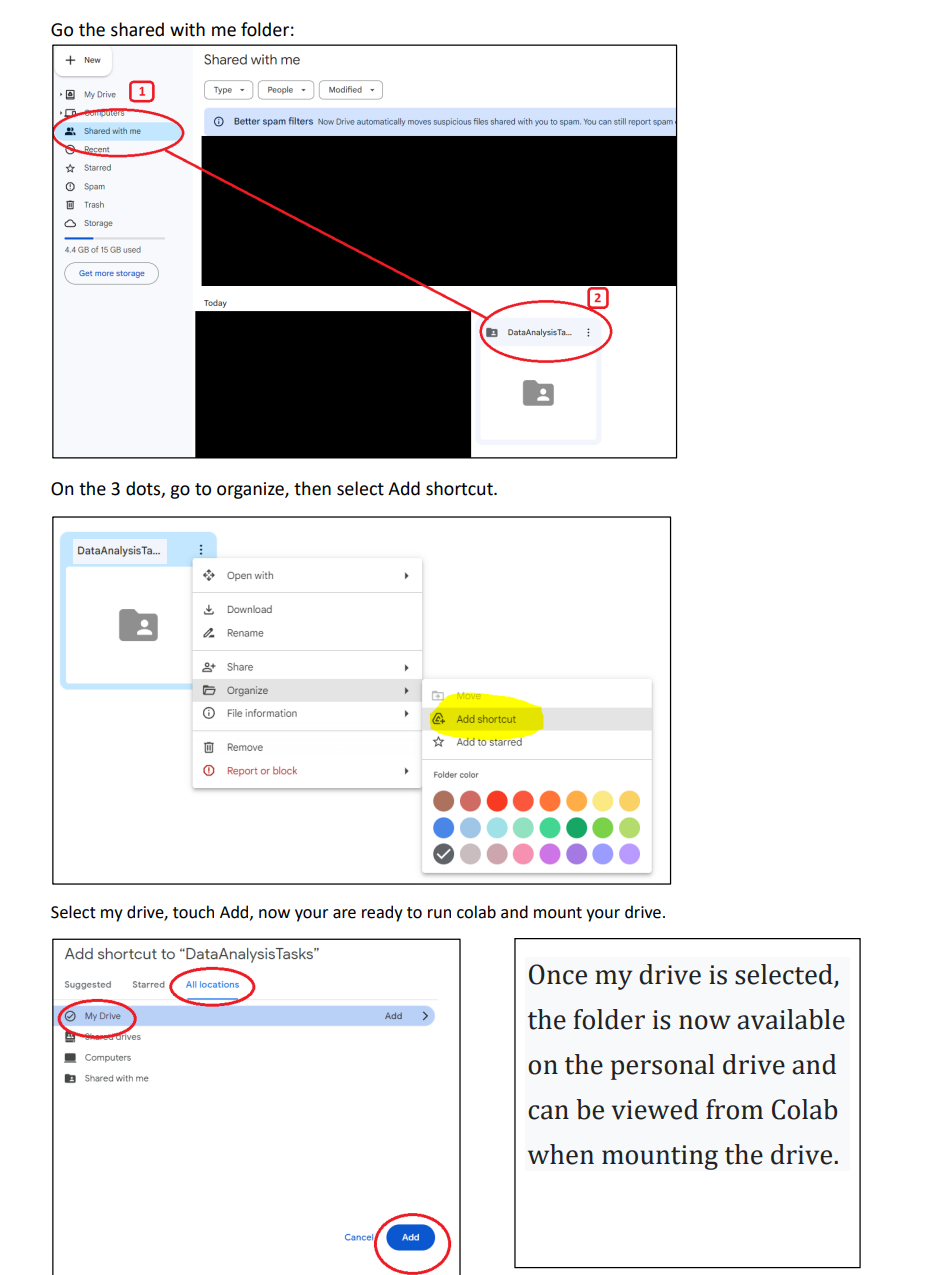

In [3]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [5]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








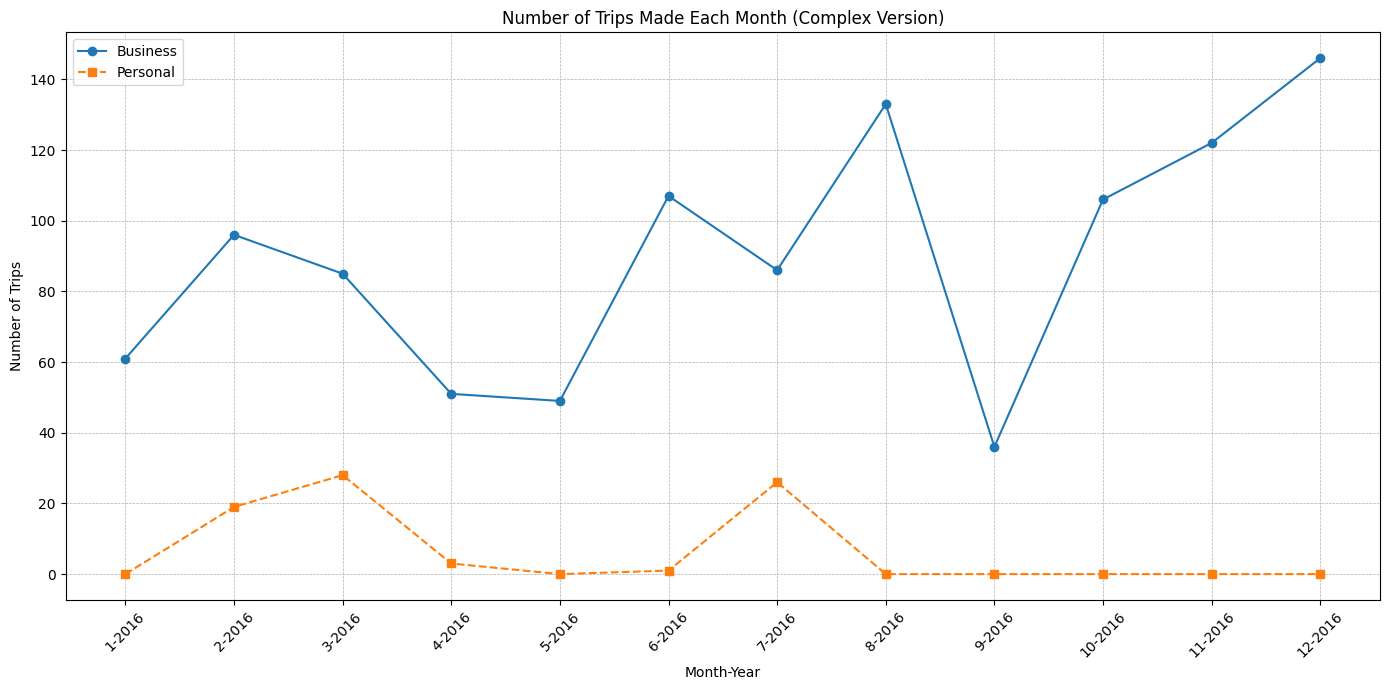

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
uber_data = pd.read_csv('/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/uber_dataset.csv')

# Preprocess the dataset
uber_data = uber_data[uber_data['START_DATE'] != 'Totals']
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')
uber_data.dropna(subset=['START_DATE', 'END_DATE'], inplace=True)

# Extract month and year for the complex code
uber_data['YEAR'] = uber_data['START_DATE'].dt.year
uber_data['MONTH'] = uber_data['START_DATE'].dt.month

# Create a pivot table for grouping
pivot_data = uber_data.pivot_table(index=['YEAR', 'MONTH'], columns='CATEGORY', aggfunc='size', fill_value=0)
pivot_data_reset = pivot_data.reset_index()
x_labels = [f"{row['MONTH']}-{row['YEAR']}" for _, row in pivot_data_reset.iterrows()]

# Plot with custom styling
plt.figure(figsize=(14, 7))
for category, linestyle, marker in zip(pivot_data.columns, ['-', '--'], ['o', 's']):
    plt.plot(x_labels, pivot_data_reset[category], linestyle=linestyle, marker=marker, label=category)

plt.title('Number of Trips Made Each Month (Complex Version)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()